## Confidence Interval

It is useful to estimate an interval for the possible values of the parameter and put a probability on how confident we are that the true parameter value falls inside this interval

## Example

We have the data  X and assume we know the population standard deviation ($\sigma$). What is confidence interval for population mean?

$P(L < \mu < U) = 1 - \alpha$

We want to obtain $L$ and $U$, with 1-$\alpha$ confidence
 

## From statics references

$L = \bar{x} - z_{1- \alpha/2}\frac{\sigma}{\sqrt{N}}$

$U = \bar{x} + z_{1- \alpha/2}\frac{\sigma}{\sqrt{N}}$

## Activity: Obtain the confidence interval for mean of sepal length for setosa

The dataset we will work is iris.cvs

Tasks:

1- Explore this dataset. How many features, records and plants does it have?

2- Gather all of the sepal length for Iris-setosa

3- Write a function that calculate lower and upper bound for mean of sepal length for Iris-setosa with %95 confidence. 

Assume $\sigma = 0.3525$

Hint: use `scipy.stats.norm.ppf()` to calculate $z_{1- \alpha/2}$



In [2]:
import pandas as pd
import numpy as np
import scipy.stats

df = pd.read_csv('Iris.csv')

x = df[df['Species'] == 'Iris-setosa']['SepalLengthCm'].tolist()

print(np.mean(x))

def ci_z(data_sample, significant_level, sigma):
    z = scipy.stats.norm.ppf(1-significant_level/2)
    L = np.mean(data_sample) - z*sigma/np.sqrt(len(data_sample))
    U = np.mean(data_sample) + z*sigma/np.sqrt(len(data_sample))
    return L, U


def ci_t(data_sample, significant_level):
    t = scipy.stats.t.ppf(1 - significant_level/2, len(data_sample) - 1)
    L = np.mean(data_sample) - t * np.std(data_sample, ddof=1) / np.sqrt(len(data_sample))
    U = np.mean(data_sample) + t * np.std(data_sample, ddof=1) / np.sqrt(len(data_sample))
    return L, U

print(ci_z(x, 0.05, 0.3525))
print(ci_t(x,0.05))

5.006
(4.908293780383348, 5.103706219616653)
(4.905823539430869, 5.106176460569132)


## Outlier Detection

Outliers are extreme values that can skew our dataset, sometimes giving us an incorrect picture of how things actually are in our dataset. The hardest part of this is determining which data points are acceptable, and which ones constitute "outlier" status.

## Activity: find and remove outliers if our dataset is Normal

When our sample data is close to normal distribution, the samples that be outside of three standard deviation can be considered as outliers.

Task: Write a function that first find outliers for a normally distributed data, then remove them.


In [12]:
import numpy as np

def find_remove_outlier(data_sample):
    # calculate summary statistics
    data_mean, data_std = np.mean(data), np.std(data)
    # define cut-off
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers, outliers_removed

## Interquartile range (IQR) for finding and removing outlier when data has any distribution

Tukey suggested to calculate the range between the first quartile (25%) and third quartile (75%) in the data, called the interquartile range (IQR).

## Activity:  IQR outlier detection and removal

Task: write a function to find and remove outliers based on IQR method for this data sample:

Hint: 

$Q_1$ is the first quartile (25%) 

$Q_3$ is the third quartile (75%) 

<img src="Images/iqr.png"> 

`x = [norm.rvs(loc=5 , scale=1 , size=100), -5, 11, 14]`


In [11]:
import numpy as np

def find_remove_outlier_iqr(data_sample):
    # calculate interquartile range
    q25, q75 = np.percentile(data_sample, 25), np.percentile(data_sample, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers

y = np.array([-5, 11, 14])
x =  np.concatenate((scipy.stats.norm.rvs(loc=5 , scale=1 , size=100), y))
print(type(x))
print(find_remove_outlier_iqr(x))
print(scipy.stats.iqr(x))

<class 'numpy.ndarray'>
[-5.0, 11.0, 14.0]
1.4155828487118614


## How we can visualy see the outlier?

Box plot use the IQR method to display data and outliers

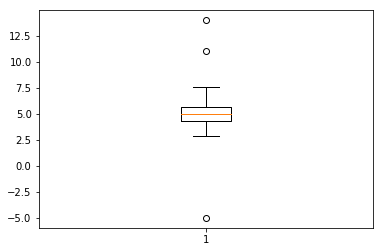

In [32]:
import matplotlib.pyplot as plt

plt.boxplot(x)

plt.show()